In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import IPython.display as ipd
import wave

In [2]:
%matplotlib widget

### Demo 1

Run the cells below to set up an interactive demo. There is a continuous signal with frequency 261 Hz (Middle C). Interactively adjust the frequency to see how undersampling can lead to erroneous alias signals at lower frequencies.

In [3]:
#set up "continuous" time
realTime = np.linspace(0, 1, 100000)
signalFreq = 261
inputSignal = np.sin(2 * np.pi * signalFreq * realTime)

<IPython.core.display.Javascript object>


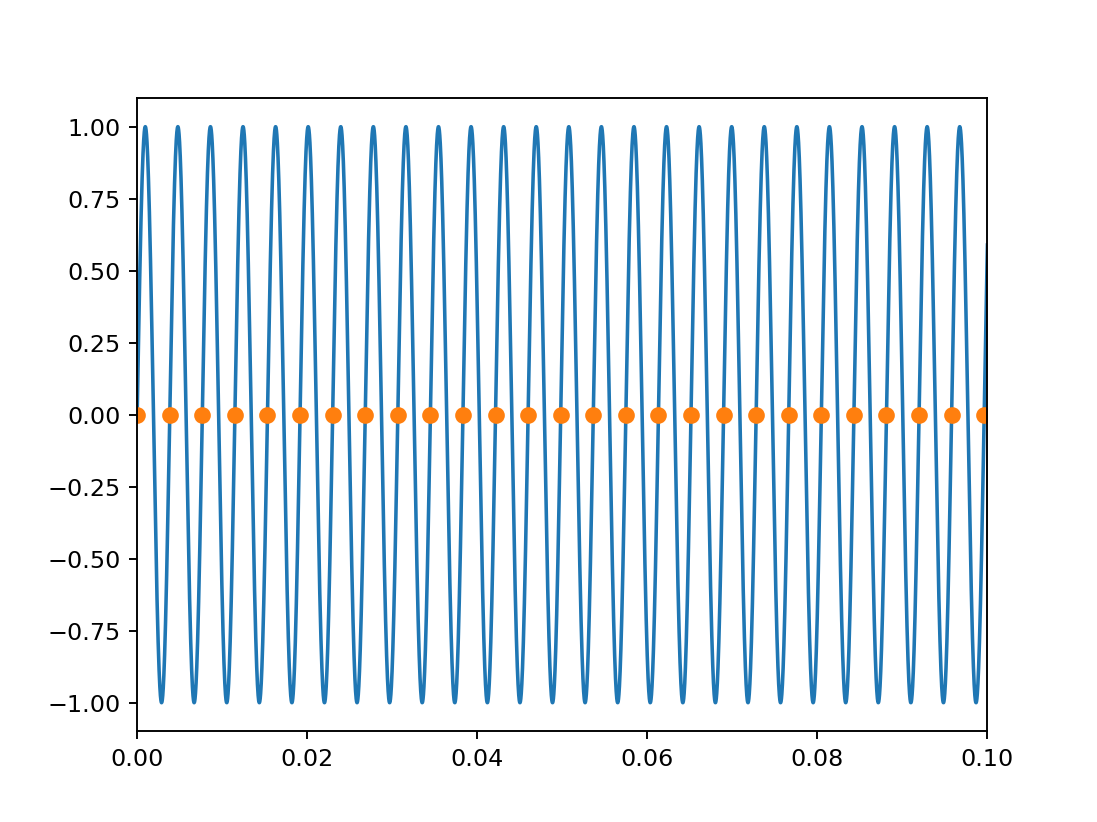

interactive(children=(IntSlider(value=1000, description='sampleFreq', max=1000, min=50), Output()), _dom_class…

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sampleFreq = 1000
sampleTime = np.arange(0, 1, 1/sampleFreq)
sampledSignal = np.sin(2 * np.pi * signalFreq * sampleTime)
line, = ax.plot(realTime, inputSignal)
dots, = ax.plot(sampleTime, sampledSignal, 'o')
ax.set_xlim(0,0.1)

def update(sampleFreq=1000):
    sampleTime = np.arange(0, 1, 1/sampleFreq)
    sampledSignal = np.sin(2 * np.pi * signalFreq * sampleTime)
    dots.set_xdata(sampleTime)
    dots.set_ydata(sampledSignal)
    fig.canvas.draw_idle()

interact(update, sampleFreq=(50, 1000));

### Demo 2

In this example we are going to keep the sampling rate constant at 3000 Hz, and change the frequency of the note that we are sampling. 

Run the cells below to make an audible tone from our sampled signal. The note starts at 200 Hz, and you can interactively change what note we are sampling.

What happens as the frequency of the note increases? Pay particular attention to what happens when the note frequency rises past half the sampling frequency (1500 Hz), past the sampling frequency (3000 Hz), an past 3/2 the sampling frequency (4500 Hz). Explain what is causing this.

What do you hear when the note is exactly the same as the sampling frequency? Explain.

In [5]:
def makeAudio(freq=200):
    sampleFreq = 3000 # sample rate
    T = 2.0    # seconds
    t = np.linspace(0, T, int(T * sampleFreq), endpoint=False) # time variable
    sampledSignal = 0.5 * np.sin(2 * np.pi * freq * t)                
    ipd.display(ipd.Audio(sampledSignal, rate=sampleFreq))


In [6]:
interact(makeAudio, freq=(200, 6000, 200));

interactive(children=(IntSlider(value=200, description='freq', max=6000, min=200, step=200), Output()), _dom_c…